In [1]:
using Pkg
Pkg.activate("deconvolution"; shared=true)

"/Users/imolk/Library/Julia/environments/deconvolution/Project.toml"

In [2]:
using LaTeXStrings
import PyPlot; plt=PyPlot
plt.rc("figure", dpi=200.0)
# plt.rc("figure", figsize=(6,4))
# plt.rc("figure", autolayout=true)
# plt.rc("savefig", dpi=300.0)
# plt.rc("text", usetex=true)
# plt.rc("font", family="serif")
# plt.rc("font", serif="Palatino")
cbbPalette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
using Optim
using Distributions
import Random

using Revise
using DeconvolveDistribution
using DeconvolveDistribution: coefs, ExpoSpline
;

┌ Info: Recompiling stale cache file /Users/imolk/Library/Julia/compiled/v0.7/DeconvolveDistribution/2elKn.ji for DeconvolveDistribution [ce248477-2e98-51a1-a641-d405f74c103f]
└ @ Base loading.jl:1185


In [3]:
# simulate some data
n = 400
F_X = MixtureModel([Normal(-1, 1), Normal(2, 0.8)], [0.6, 0.4])
σ_distr = Gamma(1.0, 4.0)
Random.seed!(1)
X = rand(F_X, n)
σ = rand(σ_distr, n)
U_distr = Normal.(0.0, σ)
U = rand.(U_distr)
W = X .+ U
;

In [84]:
# estimate F_X from simulated data
n_xx = 100
F_xx = collect(range(-8.0, stop=8.0, length=n_xx))
num_t = 50
h = 0.3
;

In [85]:
decon_settings = DeconvolveDistribution.FourierDeconv(h, F_xx, num_t)
decon_distr = DeconvolveDistribution.decon(decon_settings, W, U_distr)
;

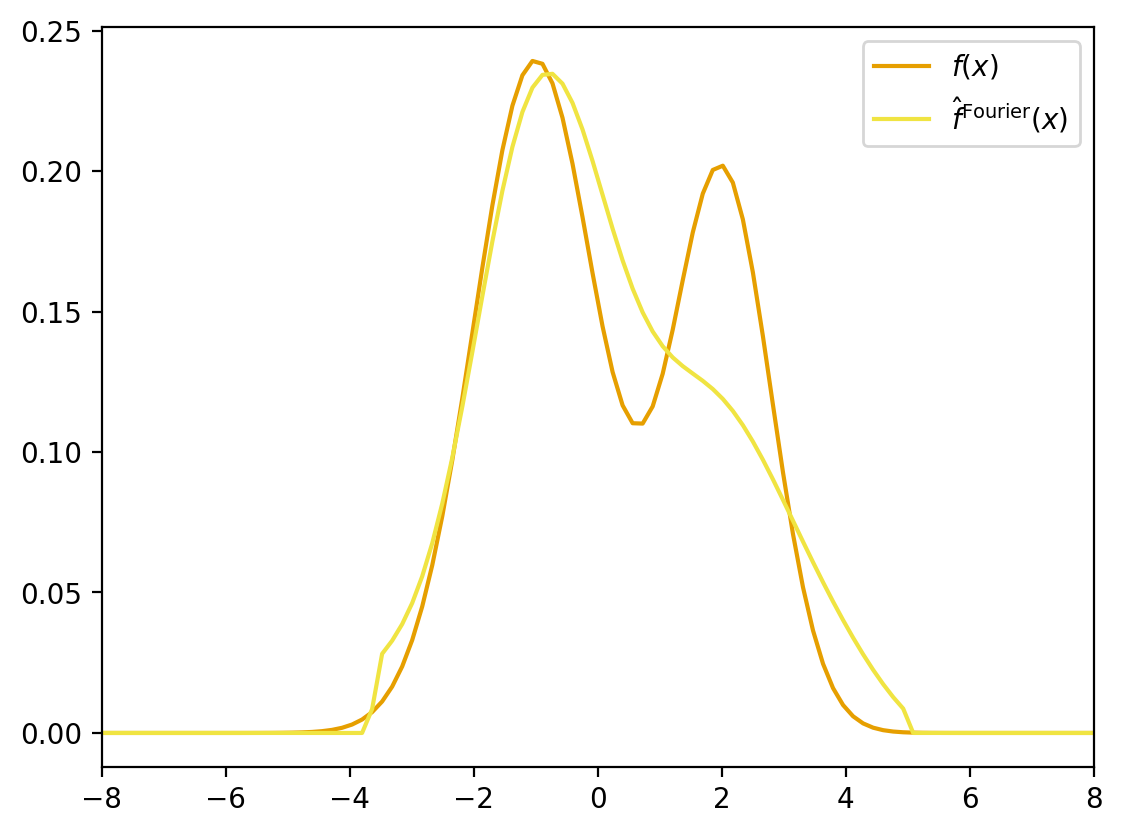

PyObject <matplotlib.legend.Legend object at 0x13c546f28>

In [86]:
plt.plot(F_xx, pdf.(F_X, F_xx), color=cbbPalette[1], label=L"f(x)")

fhat_decon_distr = pdf.(decon_distr, F_xx)
plt.plot(F_xx, fhat_decon_distr, color=cbbPalette[4], label=L"\hat{f}^{\mathrm{Fourier}}(x)")

# plt.plt[:hist](rand(decon_distr, 10_000), bins=100, normed=true, alpha=0.2)
plt.xlim(-8, 8)
plt.legend(loc="top left")

# Plugin-in method

In [75]:
U_distr[5]

Normal{Float64}(μ=0.0, σ=7.957329587641396)

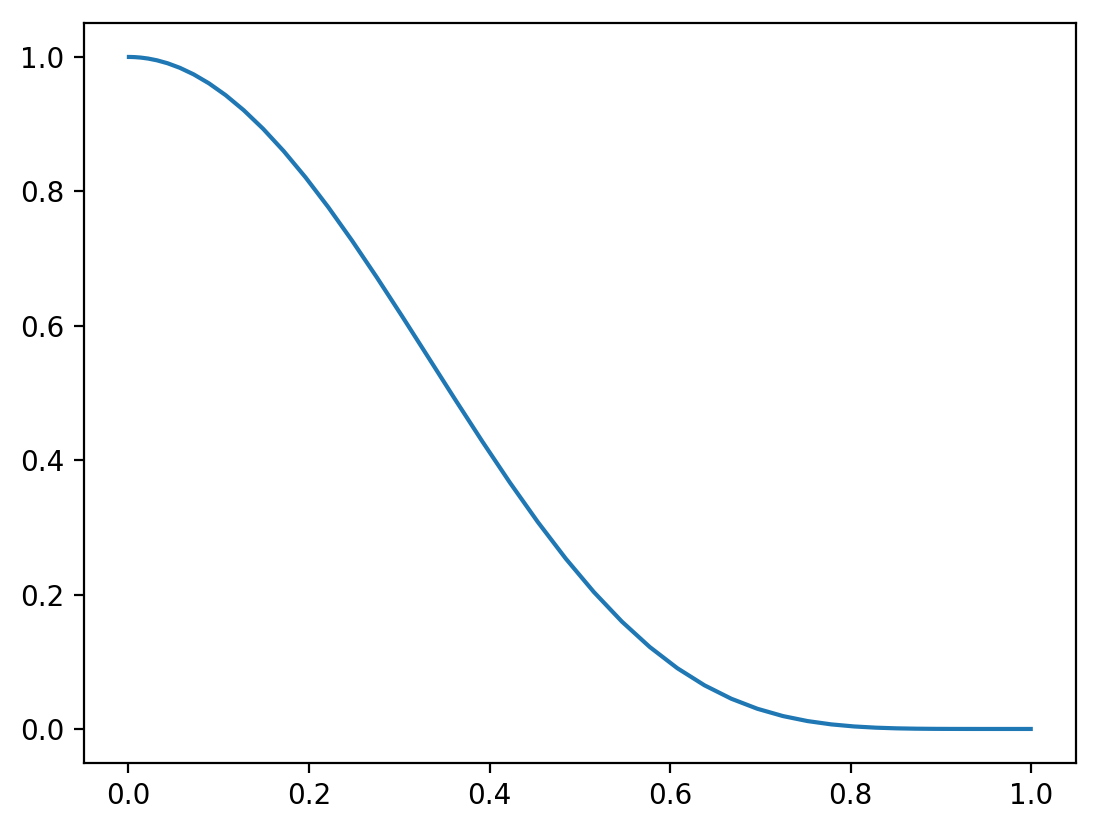

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1344b0908>

In [76]:
k = 5
h = 8.0
plt.plot(htt, abs2.(DeconvolveDistribution.ϕK.(htt)) ./ abs2.(cf.(U_distr[k], htt/h)))

In [77]:
import FastGaussQuadrature
num_t = 50
quad_nodes, t_weight = FastGaussQuadrature.gausslegendre(num_t)
htt = (quad_nodes .+ 1.0) ./ 2.0
h = 8.0
tt = htt ./ h
# equation 15
integral = 0.0
for k in 1:length(U_distr)
    for (it,ht) in enumerate(htt)
        w = t_weight[it] # quadrature weight
        integral += w * abs2(DeconvolveDistribution.ϕK(ht)) / abs2(cf(U_distr[k], ht/h))
    end
end
integral

┌ Warning: Deprecated syntax `implicit assignment to global variable `k``.
│ Use `global k` instead.
└ @ nothing none:0
┌ Warning: Loop variable `k` around In[77]:9 overwrites a variable in an enclosing scope. In the future the variable will be local to the loop instead.
└ @ nothing In[77]:9


290.5101823626821